In [1]:
import numpy as np

## Catching Up

In [2]:
a = np.linspace(0,2,9)

In [3]:
a.dtype

dtype('float64')

In [4]:
a.astype('int32')

array([0, 0, 0, 0, 1, 1, 1, 1, 2])

In [5]:
#Comparison

a = np.array([[1,2],[2,3]])
b = np.array([[1,1],[2,3]])

In [6]:
a == b

array([[ True, False],
       [ True,  True]])

In [7]:
a > 1

array([[False,  True],
       [ True,  True]])

In [8]:
a[a>1]

array([2, 2, 3])

In [9]:
a.ravel()

array([1, 2, 2, 3])

In [10]:
np.insert(a, 1, 5)

array([1, 5, 2, 2, 3])

In [11]:
np.ceil(50.5)

51.0

## Reading from file

In [12]:
data = np.genfromtxt('Text.txt', delimiter=',')

In [13]:
data

array([[  1.,  13.,  21.,  11., 196.,  75.,   4.,   3.,  34.,   6.,   7.,
          8.,   0.,   1.,   2.,   3.,   4.,   5.],
       [  3.,  42.,  12.,  33., 766.,  75.,   4.,  55.,   6.,   4.,   3.,
          4.,   5.,   6.,   7.,   0.,  11.,  12.],
       [  1.,  22.,  33.,  11., 999.,  11.,   2.,   1.,  78.,   0.,   1.,
          2.,   9.,   8.,   7.,   1.,  76.,  88.]])

In [14]:
data.shape

(3, 18)

Pandas is built on top of numpy

## Image Operations

In [15]:
import numpy as np
import matplotlib.pylab as plt

%matplotlib inline

In [16]:
im = plt.imread("puppy.jpeg")

In [17]:
im.shape

(148, 148, 3)

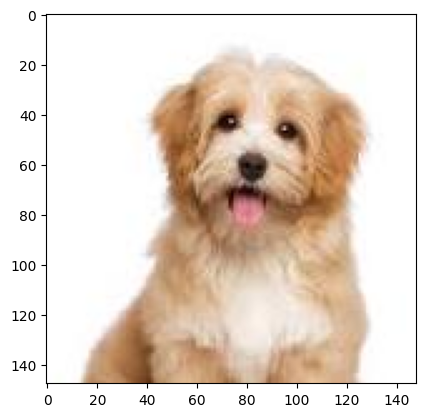

In [18]:
plt.imshow(im)

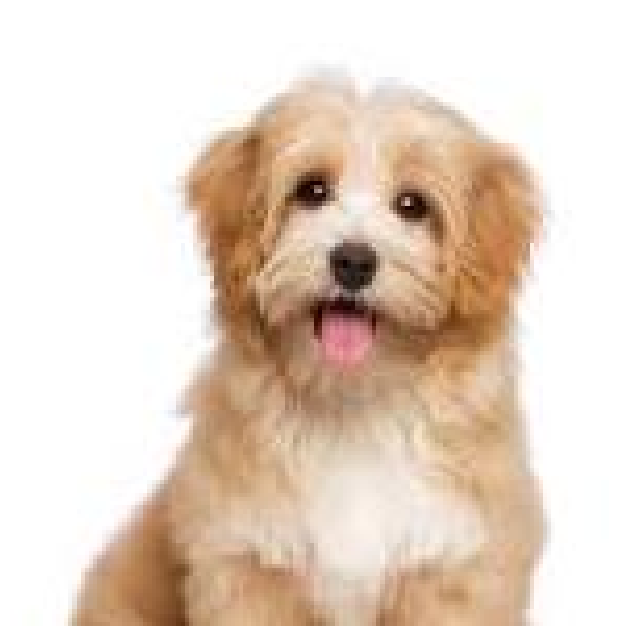

In [19]:
def plti(im, h=8, **kwargs):
    y = im.shape[0]
    x = im.shape[1]
    w = (y/x) * h
    plt.figure(figsize=(w,h))
    plt.imshow(im, interpolation='none', **kwargs)
    plt.axis('off')

plti(im)

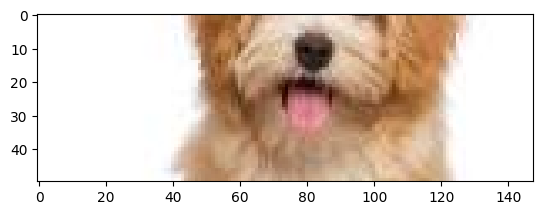

In [20]:
plt.imshow(im[50:100,:,:])

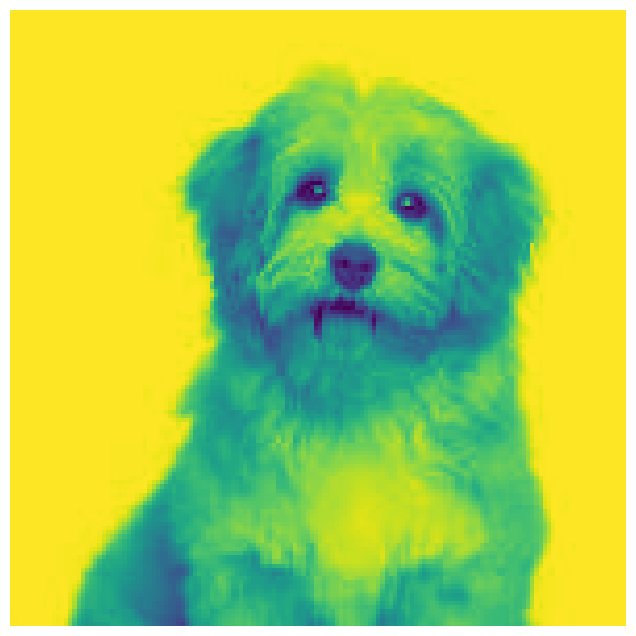

In [21]:
plti(im[:,:,1])

In [22]:
#temp image

tmp_im = np.zeros(im.shape, dtype='uint8')

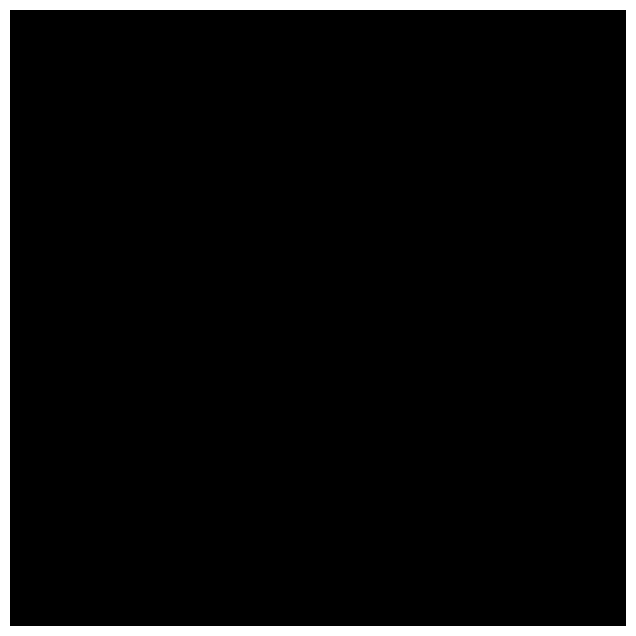

In [23]:
plti(tmp_im)

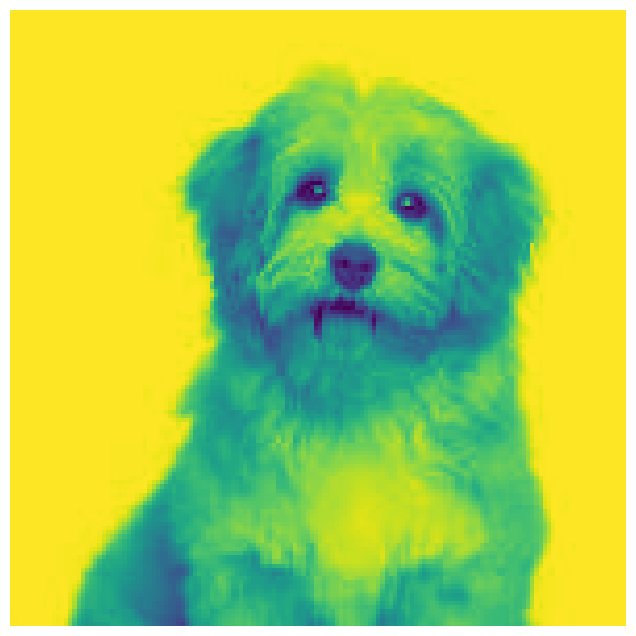

In [24]:
tmp_im = im[:,:,1]
plti(tmp_im)

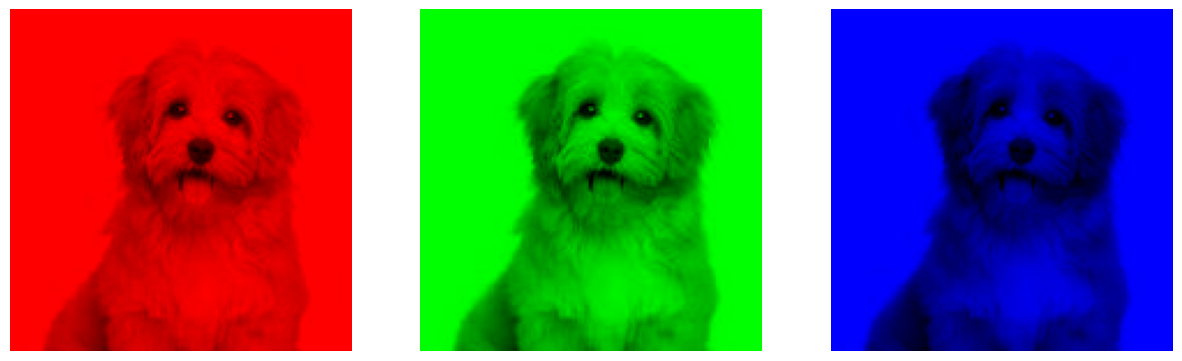

In [25]:
fig, axs = plt.subplots(nrows=1, ncols=3, figsize = (15,5))

for c , ax in zip(range(3), axs):
    tmp_im = np.zeros(im.shape, dtype="uint8")
    tmp_im[:,:,c] = im[:,:,c]
    ax.imshow(tmp_im)
    ax.set_axis_off()

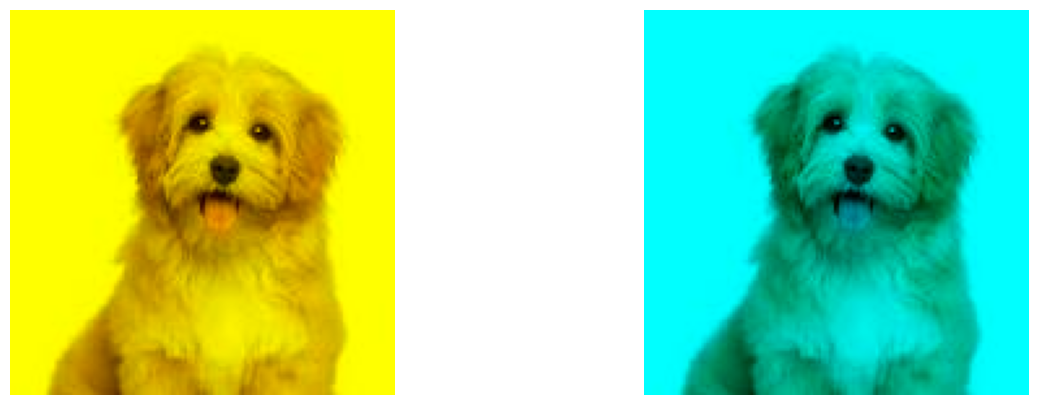

In [26]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize = (15,5))

for c , ax in zip(range(2), axs):
    tmp_im = np.zeros(im.shape, dtype="uint8")
    tmp_im[:,:,c] = im[:,:,c]
    tmp_im[:,:,c+1] = im[:,:,c+1]
    ax.imshow(tmp_im)
    ax.set_axis_off()

## Image Smoothening

In [28]:
a = np.zeros((8,8))
a

array([[0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.]])

In [29]:
def do_normlaize(im):
    return -np.log(1/((1+im)/257)-1)

def undo_normalize(im):
    return (1+1/(np.exp(-im)+1)*257).astype("uint8")

def rotation_matrix(theta):
    return np.c_[
        [1,0,0],
        [0,np.cos(theta), -np.sin(theta)],
        [0,np.sin(theta),np.cos(theta)]
    ]

C:\Users\TESS\AppData\Local\Temp\ipykernel_17924\1590630647.py:2: RuntimeWarning: divide by zero encountered in divide
  return -np.log(1/((1+im)/257)-1)
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


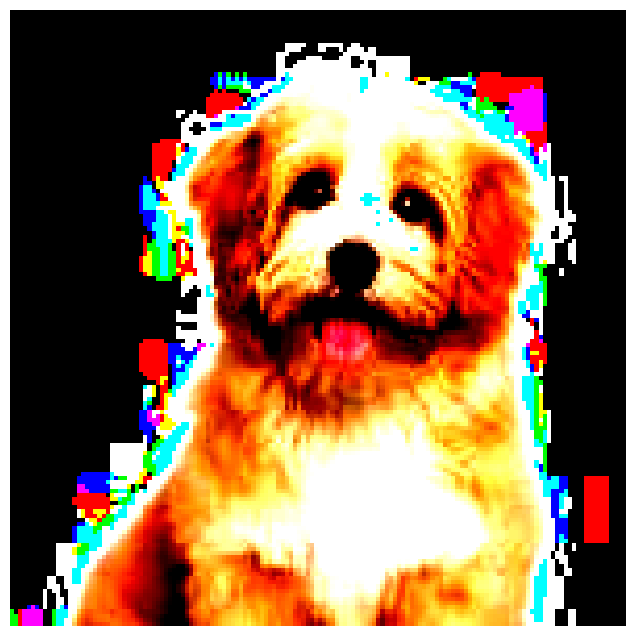

In [31]:
plti(do_normlaize(im))

## Problems

In [37]:
a = np.array([[1,2,3],[4,5,6],[7,8,9]])

#1) Create same matrix as a , using np arange and reshape function

a = np.arange(1,10)
a = np.reshape(a,(3,3))
a

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

In [40]:
a.shape[0]

3

In [41]:
#2) Get the Diagonal Elements:

for i in range(a.shape[0]):
    print(a[i][i])

1
5
9


In [45]:
#3) Adding Depth Dimension:

a = np.reshape(a, (3,3,1))
a

array([[[1],
        [2],
        [3]],

       [[4],
        [5],
        [6]],

       [[7],
        [8],
        [9]]])

In [46]:
#4) Mean Absolute Error:

y = np.array([1,4,3,6,7])
y_hat = np.array([2,3,5,6,3])

mae = np.sum(np.abs(y-y_hat))/len(y)
mae

1.6

In [50]:
#5) Standardization & Normalization:

std_value = (y - np.mean(y))/(np.std(y))
print("Standardization:", std_value)

max_min_norm = (y - np.min(y))/(np.max(y) - np.min(y))
print("Min_max_ Norm:",max_min_norm)

Standardization: [-1.4985373  -0.09365858 -0.56195149  0.84292723  1.31122014]
Min_max_ Norm: [0.         0.5        0.33333333 0.83333333 1.        ]


In [53]:
#6) Create 4x4 matrix with random variables:

arr = np.random.randint(10,50,size=(4,4))
print("4x4 array:\n",arr)

4x4 array:
 [[22 35 40 22]
 [12 31 37 22]
 [17 28 42 15]
 [45 27 29 46]]


In [58]:
#7) Maxpooling:

maxP_arr = np.zeros((2,2))
maxP_arr[0][0] = np.max(arr[:2,:2])
maxP_arr[0][1] = np.max(arr[:2,2:])
maxP_arr[1][0] = np.max(arr[2:,:2])
maxP_arr[1][1] = np.max(arr[2:,2:])
print("MaxPooling:\n", maxP_arr)

MaxPooling:
 [[35. 40.]
 [45. 46.]]


In [59]:
#8) Average Pooling:

avgP_arr = np.zeros((2,2))
avgP_arr[0][0] = np.average(arr[:2,:2])
avgP_arr[0][1] = np.average(arr[:2,2:])
avgP_arr[1][0] = np.average(arr[2:,:2])
avgP_arr[1][1] = np.average(arr[2:,2:])
print("MaxPooling:\n", avgP_arr)

MaxPooling:
 [[25.   30.25]
 [29.25 33.  ]]


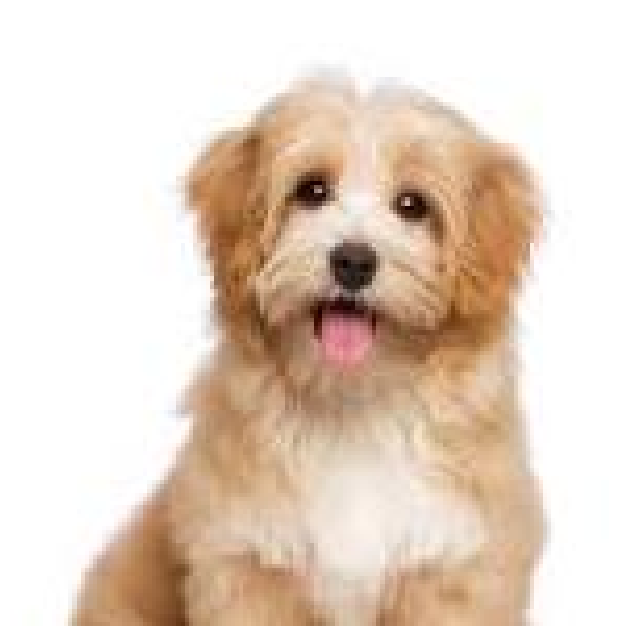

In [65]:
#9) Mix R+G, G+B, R+B

im = plt.imread("puppy.jpeg")

def plti(im, h=8, **kwargs):
    y = im.shape[0]
    x = im.shape[1]
    w = (y/x) * h
    plt.figure(figsize=(w,h))
    plt.imshow(im, interpolation='none', **kwargs)
    plt.axis('off')

plti(im)


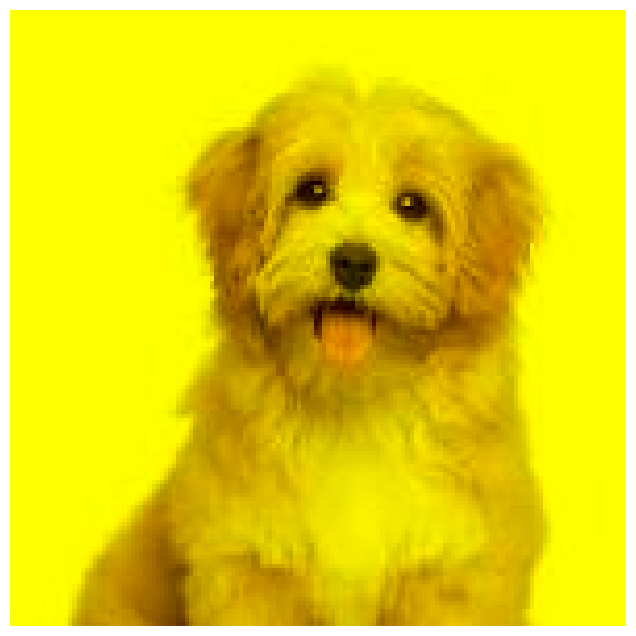

In [69]:
rgImage = np.zeros(im.shape,dtype = "uint8")
rgImage[:,:,0] = im[:,:,0]
rgImage[:,:,1] = im[:,:,1]
plti(rgImage)

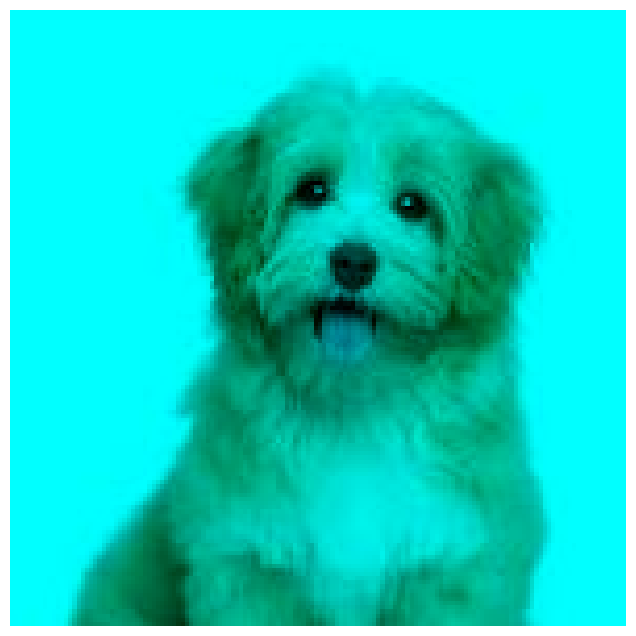

In [70]:
gbImage = np.zeros(im.shape,dtype = "uint8")
gbImage[:,:,1] = im[:,:,1]
gbImage[:,:,2] = im[:,:,2]
plti(gbImage)

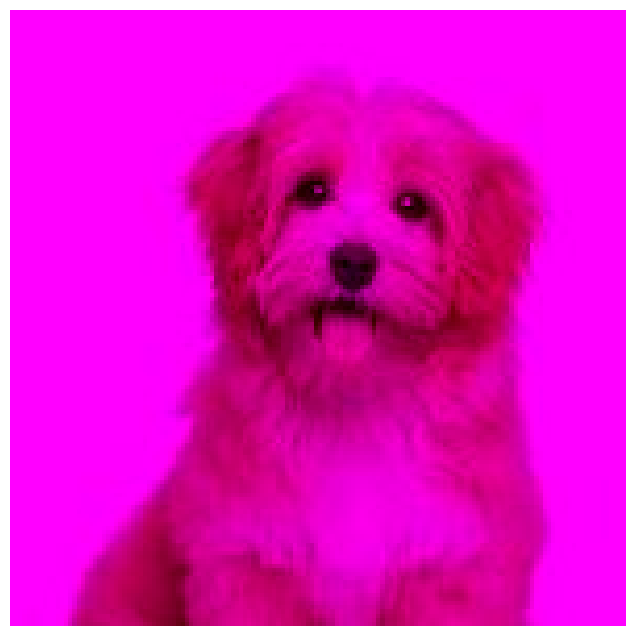

In [71]:
rbImage = np.zeros(im.shape,dtype = "uint8")
rbImage[:,:,0] = im[:,:,0]
rbImage[:,:,2] = im[:,:,2]
plti(rbImage)

Rotation 90:



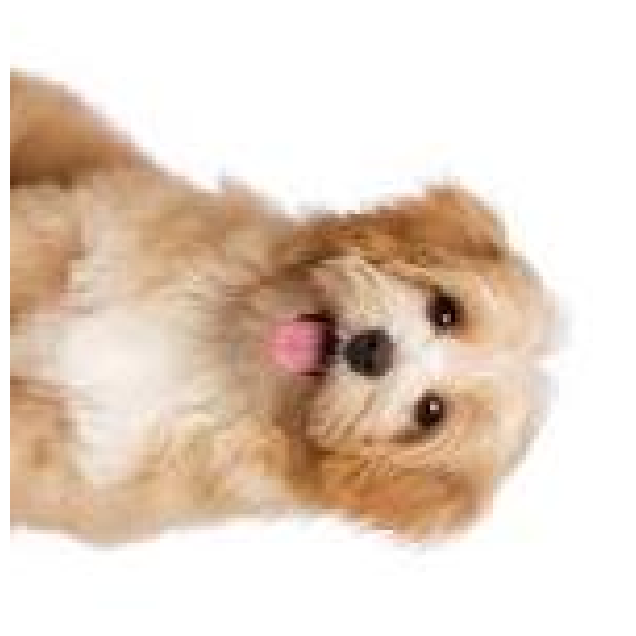

In [75]:
#10) Image Rotation 90 and Flip:

im_rotation = np.transpose(im,(1,0,2))
im_rotation = np.fliplr(im_rotation)

print("Rotation 90:\n")
plti(im_rotation)